In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# geting the server info
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port
                                                   , postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [5]:
# Misiing Cleaning
# filling missing value with mean
df1 = df.copy()
our_list = df.columns
for column in our_list[3:]:
    df[column].fillna(df[column].mean(),inplace=True)
df1.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


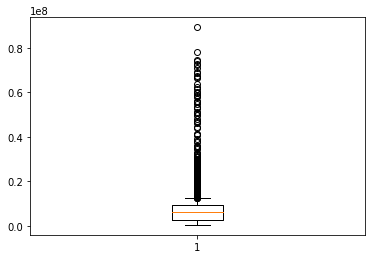

In [6]:
plt.boxplot(df['TOTAL_REVENUE'],whis=.5)
plt.show()

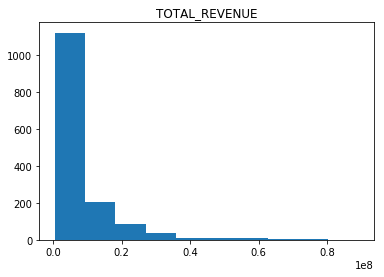

In [7]:
plt.hist(df['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE')
plt.show()

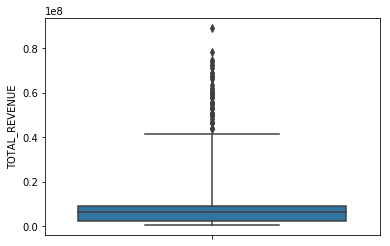

In [8]:
g = sns.boxplot(y = df['TOTAL_REVENUE'],whis=5)
plt.show()

In [9]:
from scipy.stats import zscore

z_score_TOTAL_REVENUE = zscore(df['TOTAL_REVENUE'])

for i in range(1,5):
    print('This is the zscore threshold :{}'.format(i))
    print('These are the outliers indicies:')
    print(np.where(z_score_TOTAL_REVENUE > i))
    print('This is the number of outliers : {}'.format(len((np.where(z_score_TOTAL_REVENUE > i)[0]))))

This is the zscore threshold :1
These are the outliers indicies:
(array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285]),)
This is the 

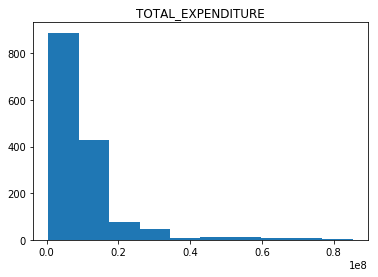

In [10]:
plt.hist(df['TOTAL_EXPENDITURE'])
plt.title('TOTAL_EXPENDITURE')
plt.show()

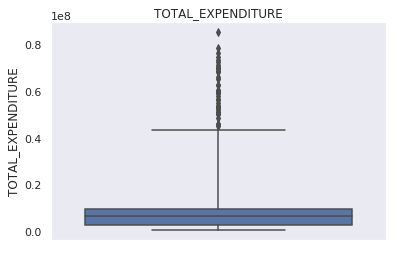

In [11]:
sns.set(style = 'dark')
g = sns.boxplot(y=df['TOTAL_EXPENDITURE'],whis=5)
plt.title('TOTAL_EXPENDITURE')
plt.show()

In [12]:
# for total expendeture I will use z score
from scipy.stats import zscore

z_score_TOTAL_EXPENDITURE = zscore(df['TOTAL_EXPENDITURE'])

for i in range(1,5):
    print('This is the zscore threshold :{}'.format(i))
    print('These are the outliers indicies:')
    print(np.where(z_score_TOTAL_EXPENDITURE > i))
    print('This is the number of outliers : {}'.format(len(np.where(z_score_TOTAL_EXPENDITURE > i)[0])))

This is the zscore threshold :1
These are the outliers indicies:
(array([   4,   32,   56,   85,  108,  137,  150,  161,  190,  213,  241,
        252,  264,  292,  304,  316,  344,  355,  367,  396,  407,  420,
        449,  460,  472,  481,  501,  512,  524,  533,  552,  564,  576,
        585,  605,  611,  616,  628,  633,  637,  654,  656,  662,  668,
        680,  685,  689,  698,  706,  708,  714,  719,  731,  737,  741,
        750,  758,  760,  763,  766,  771,  784,  789,  793,  811,  813,
        816,  819,  824,  836,  842,  846,  855,  863,  865,  868,  871,
        876,  891,  897,  901,  919,  921,  924,  927,  932,  944,  950,
        954,  971,  973,  976,  979,  984,  997, 1002, 1006, 1023, 1025,
       1028, 1031, 1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088,
       1101, 1106, 1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161,
       1178, 1180, 1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234,
       1237, 1242, 1254, 1259, 1263, 1280, 1282, 1285]),)


# part (2)

In [13]:
from scipy.stats.mstats import winsorize

winsorized_TOTAL_REVENUE = winsorize(df['TOTAL_REVENUE'],(0,.15))
winsorized_TOTAL_REVENUE

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

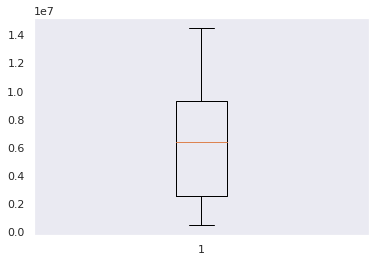

In [14]:

plt.boxplot(winsorized_TOTAL_REVENUE)
plt.show()

In [15]:
winsorized_TOTAL_EXPENDITURE = winsorize(df['TOTAL_EXPENDITURE'],(0,.10))

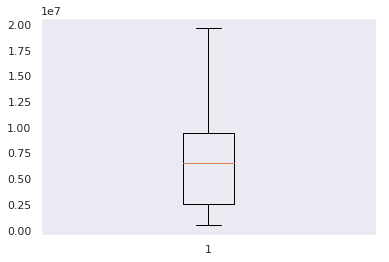

In [16]:
plt.boxplot(winsorized_TOTAL_EXPENDITURE)
plt.show()

# Part (3)

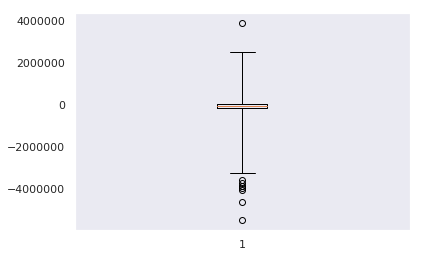

In [17]:
df['budget']= df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']
plt.boxplot(df['budget'],whis=20)
plt.show()

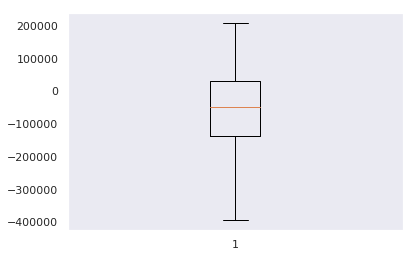

In [18]:
winsorized_budget = winsorize(df['budget'],(.10,.10))
plt.boxplot(winsorized_budget,whis=5)
plt.show()

# Part (4)

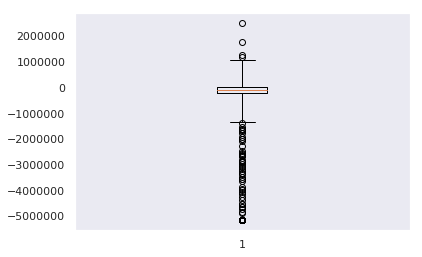

In [19]:
df['winsorized_budget']= winsorized_TOTAL_REVENUE - winsorized_TOTAL_EXPENDITURE 
plt.boxplot(df['winsorized_budget'],whis=5)
plt.show()

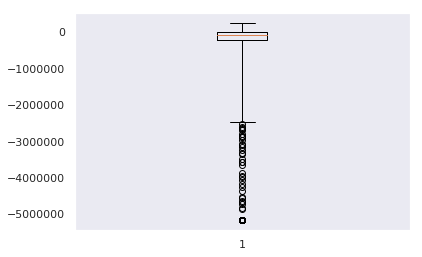

In [24]:
winsorized = winsorize(df['winsorized_budget'],(.1,.05))
plt.boxplot(winsorized,whis=10)
plt.show()

In [21]:
pd.DataFrame({"original_budget": df['budget'], "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1492.000000,1.492000e+03
mean,-1.045990e+05,-66300.347958,-6.746103e+05
std,5.310770e+05,172254.236587,1.616828e+06
min,-5.487742e+06,-395270.000000,-5.173314e+06
25%,-1.360070e+05,-136007.000000,-2.104335e+05
50%,-4.849350e+04,-48493.500000,-9.077350e+04
75%,2.965425e+04,29654.250000,1.505075e+04
max,3.897129e+06,208528.000000,2.560460e+05


# Part (6)
It deponds on the experiment, but mostly it's better to wisorize after all the calculations because for example, differencing might eliminate some of the outliers.